In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/crop_yield.csv')

In [ ]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
df.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
8240,Other Kharif pulses,2002,Kharif,Nagaland,1800.0,950,1536.6,170406.00,450.00,0.473750
9946,Maize,2006,Kharif,Punjab,154000.0,481000,569.6,19667340.00,33880.00,3.202308
12381,Cotton(lint),2011,Kharif,Uttar Pradesh,3842.0,911,777.4,643611.84,1267.86,0.236000
4469,Tobacco,2015,Kharif,Andhra Pradesh,19100.0,128256,940.7,3016081.00,6303.00,5.955263
18262,Barley,2017,Kharif,Jammu and Kashmir,93.0,33,1279.1,14641.92,35.34,0.354000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
df.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
df['Annual_Rainfall'].isnull().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])
df['Season'] = le.fit_transform(df['Season'])
df['State'] = le.fit_transform(df['State'])

In [ ]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997,4,2,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,1,1997,1,2,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,8,1997,1,2,796.0,22,2051.4,75755.32,246.76,0.238333
3,9,1997,4,2,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,11,1997,1,2,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
X = df.drop("Yield", axis=1)
y = df["Yield"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 225.85192571024965
R² Score: 0.9363373009992785


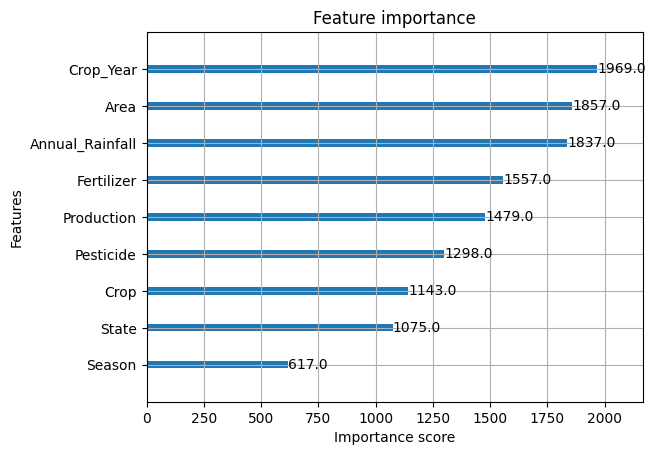

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
plt.show()

In [ ]:
train_pred = model.predict(X_train)
r2_train = r2_score(y_train, train_pred)
print("Train R²:", r2_train)
print("Test R²:", r2)

Train R²: 0.9999933415410057
Test R²: 0.9363373009992785


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=30,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best Params:", search.best_params_)
print("Best Score:", search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best Score: 0.9563741563856293


In [ ]:
best_model = XGBRegressor(
    subsample=0.6,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    gamma=0.2,
    colsample_bytree=0.6,
    random_state=42
)

best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Test RMSE:", mean_squared_error(y_test, y_test_pred))


Train R²: 0.9988254352744261
Test R²: 0.9543491789421744
Test RMSE: 36577.25769731958


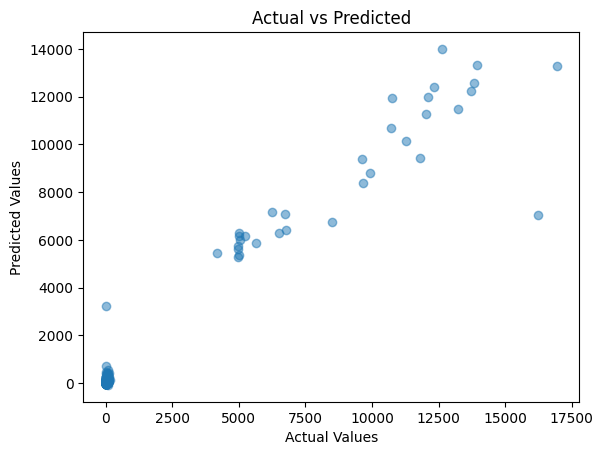

In [ ]:
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
import joblib

joblib.dump(best_model, "xgb_model.pkl")

model = joblib.load("xgb_model.pkl")